# PINGDINDSHAN'S NUMBER 


## PREIZKUŠANJE FUNKCIJ SAGEA

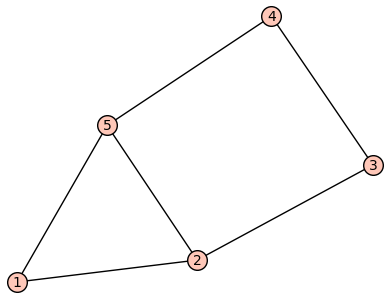

In [36]:
### Koda v Sage-u, ki izriše graf s 5 vozlišči in 6 povezavami

# Uvozim razred Graph iz SageMath-a
G = Graph()

# Dodam 5 vozlišč
G.add_vertices([1, 2, 3, 4, 5])

# Vozliščem dodam povezave
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 5)]
G.add_edges(edges)

# Izrišem graf
G.show()
# dob bibuuerb

In [33]:
def pds(G):
    stevilo = 0
    for v in G.vertices():
        for u in G.vertices():
            if u != v:
                stevilo += len(G.all_paths(u,v))
    stevilo = stevilo/2
    stevilo += len(G.vertices())
    return stevilo


In [37]:
pds(G)

37

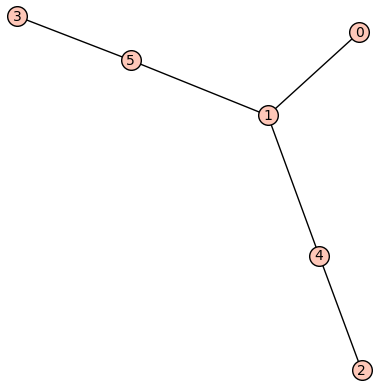

In [21]:
H = graphs.RandomGNM(6,5)
H.show()

In [22]:
pingdingshan(H)

36

## VSI GRAFI

Spodaj je definirana funkcija ustvari_vse_grafe, ki ustvari vse povezane grafe na $1,...,12$ vozliščih. Funkcija vključi tudi vse izomorfne grafe.

In [ ]:
def ustvari_vse_grafe():
    from itertools import combinations
    vozlisca = [1, 2, 3, 4, 5, 6]
    vsi_povezani_grafi = []
    
    vse_mozne_povezave = list(combinations(vozlisca, 2))
    
    for r in range(len(vozlisca) - 1, len(vse_mozne_povezave) + 1):
        for edges in combinations(vse_mozne_povezave, r):
            G = Graph()
            G.add_vertices(vozlisca)
            G.add_edges(edges)
            
            if G.is_connected():
                vsi_povezani_grafi.append(G)
    
    return vsi_povezani_grafi, len(vsi_povezani_grafi)

# Test kode
povezani_grafi, st_povezanih = ustvari_vse_grafe()
print(f"Število vseh povezanih grafov na 6 vozliščih je: {st_povezanih}")

Število vseh povezanih grafov na 12 vozliščih je: 26704


In [ ]:
# Funkcija, ki ustvari generatorje za vse grafe na i=1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih ( en generator za vsak i)
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1,13):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())

12

In [ ]:
from sage.graphs.graph_generators import GraphGenerators

In [24]:
for G in GraphGenerators.all_graphs(3):
    show(G)

AttributeError: type object 'GraphGenerators' has no attribute 'all_graphs'

## DVODELNI GRAFI

In [2]:
# Funkcija, ki ustvari vse dvodelne grafe na i vozliščih, kjer i = 1, ..., 12.

def dvodelni_grafi():
    seznam_dvodelnih = []
    for i in range(1, 13):
        for k in range(0, i + 1):
            dvodelen_graf = graphs.CompleteBipartiteGraph(k, i - k)
            seznam_dvodelnih.append(dvodelen_graf)
    return seznam_dvodelnih

dvodelni = dvodelni_grafi()
len(dvodelni)


90

In [ ]:
pds_dvodelni = {}
def st_poti(seznam_grafov):
    
    for G in seznam_grafov:
        st_vozlisc = len(G.vertices())
        if pds_dvodelni.get(st_vozlisc) is None:
            pds_dvodelni[st_vozlisc] = []
        pds_dvodelni[st_vozlisc] = pds_dvodelni[st_vozlisc].append(pds(G))
    return pds_dvodelni 


SyntaxError: 'return' outside function (1681668147.py, line 7)

## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [ ]:
def grafi_brez_trikotnikov():
    seznam_brez_trikotnikov = []
    trikotnik = graphs.CycleGraph(3)
    for g in vsi_grafi:
        if g.subgraph_search(trikotnik) is None:
            seznam_brez_trikotnikov.append(g)
    return seznam_brez_trikotnikov
            
grafi_brez_trikotnikov = grafi_brez_trikotnikov()
        

In [31]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1,13):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [32]:
slovar_brez_trikotnikov = {
    1:[], 2:[], 3:[], 4:[], 5:[], 6:[],7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

def pds_brez_trikotnikov():
    for gen in grafi_brez_trikotnikov:
        for g in gen:
            slovar_brez_trikotnikov[g.order()].append(pds(g))
    return slovar_brez_trikotnikov

pds_brez_trikotnikov= pds_brez_trikotnikov()

KeyboardInterrupt: 

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozluščih za i=1,...,12 in šteju vseh poti na teh grafih.

In [58]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(2,13,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()

In [61]:
slovar_kub_grafi = {
    2:[],4:[],6:[],8:[],10:[],12:[]}

def pds_kub_grafi():
    for gen in kub_grafi:
        for g in gen:
            slovar_kub_grafi[g.order()].append(pds(g))
    return slovar_kub_grafi

pds_kub_grafi= pds_kub_grafi()

In [62]:
pds_kub_grafi

{2: [],
 4: [34],
 6: [141, 135],
 8: [452, 460, 426, 376, 446],
 10: [1303,
  1305,
  1295,
  1093,
  1241,
  1185,
  643,
  1039,
  1335,
  1279,
  1243,
  1255,
  1351,
  1375,
  1181,
  1183,
  1237,
  915,
  1049],
 12: [2946,
  3378,
  3378,
  3546,
  3666,
  3390,
  3614,
  2830,
  2446,
  3330,
  3346,
  3466,
  3746,
  3458,
  3422,
  3448,
  3192,
  3174,
  2782,
  2790,
  3182,
  3210,
  2822,
  3272,
  3266,
  3016,
  1656,
  2382,
  3050,
  3184,
  3284,
  1710,
  2884,
  2642,
  2826,
  3510,
  3574,
  3700,
  3512,
  3636,
  3312,
  3420,
  2646,
  3024,
  3218,
  3610,
  3278,
  3356,
  3340,
  2676,
  3198,
  2708,
  3556,
  3644,
  3626,
  3464,
  3674,
  3466,
  3522,
  3738,
  3418,
  3164,
  3030,
  3012,
  2868,
  2330,
  3144,
  2670,
  2318,
  1608,
  3014,
  2722,
  3286,
  3270,
  3186,
  3042,
  3210,
  3202,
  2078,
  1544,
  2658,
  2782,
  2626,
  2336,
  2412]}